In [10]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

# Load the California Housing dataset
housing = fetch_california_housing(as_frame=True)

# Create a pandas DataFrame
df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target

# Display the first few rows of the DataFrame
display(df.head())

# Print dataset description
print(housing.DESCR)
print(f"Number of samples: {df.shape[0]}")
print(f"Number of features: {df.shape[1]-1}") # Subtract 1 to exclude the target variable

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

Shape of the DataFrame: (20640, 9)

Data Types:
MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

Missing Values:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

Descriptive Statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129  

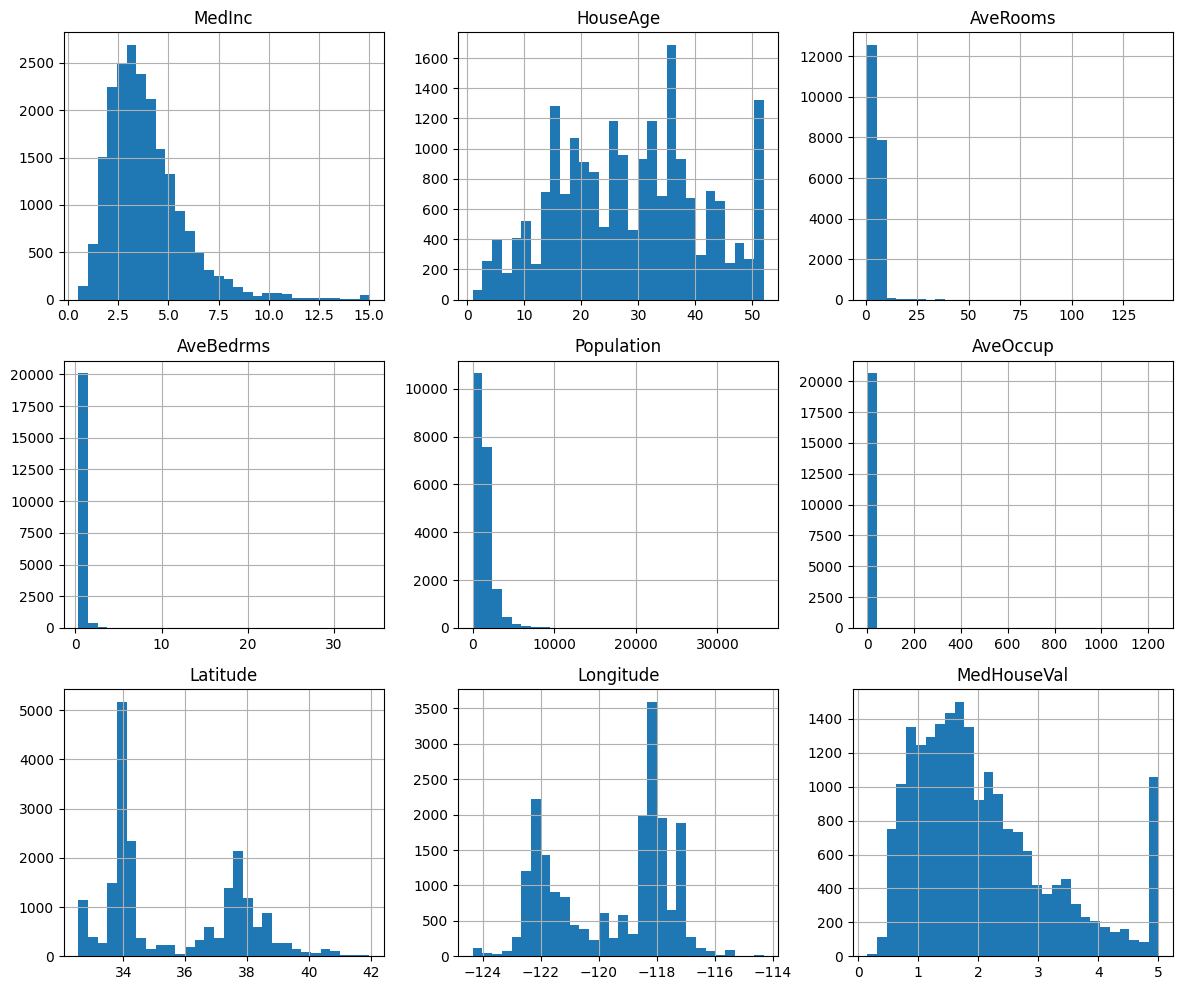


Box Plots of Numerical Features:


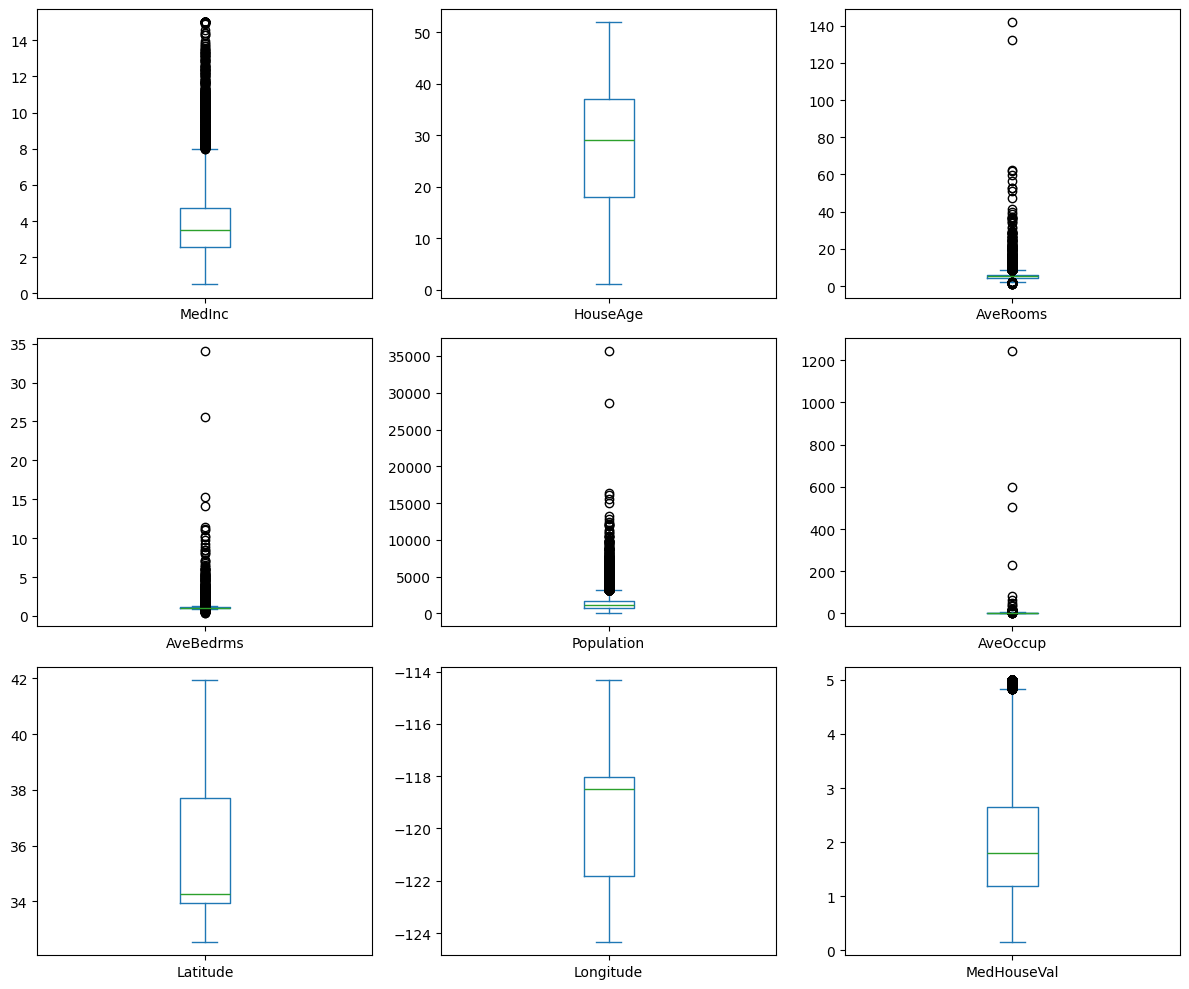


Correlation Matrix:
               MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc       1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge    -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms     0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms   -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population   0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup     0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude    -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude   -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
MedHouseVal  0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

             Latitude  Longitude  MedHouseVal  
MedInc      -0.079809  -0.015176     0.688075  
HouseAge     0.011173  -0.108197     0.105623  
AveRooms     0.106389  -0.027540     0.151948  
AveBed

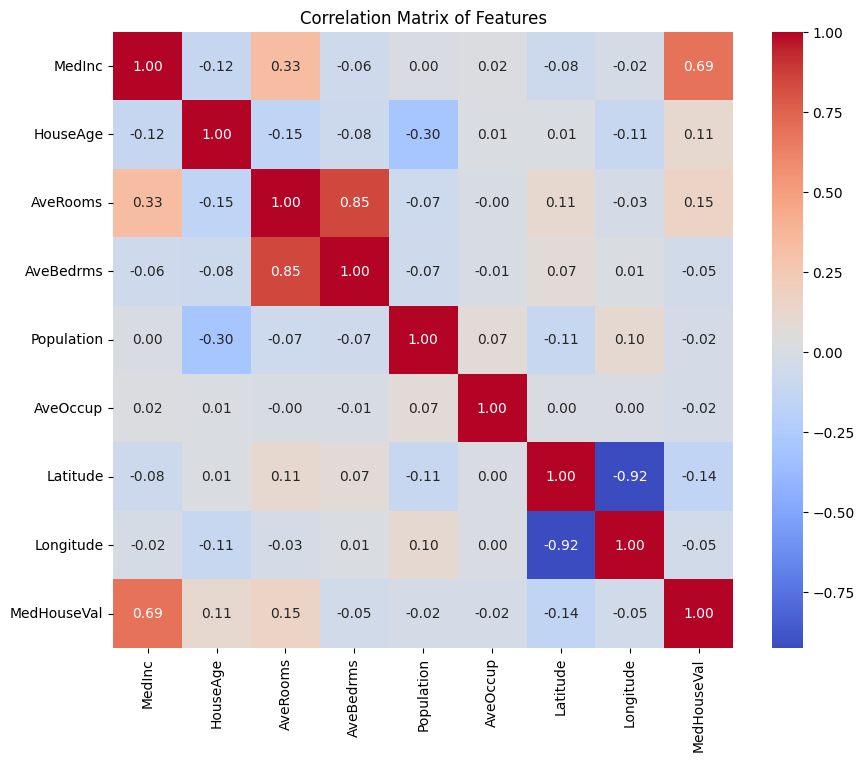

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the shape of the DataFrame
print(f"Shape of the DataFrame: {df.shape}")

# Examine data types
print("\nData Types:")
print(df.dtypes)

# Identify missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Descriptive statistics for numerical features
print("\nDescriptive Statistics:")
print(df.describe())

# Analyze the distribution of numerical features
print("\nDistribution of Numerical Features:")
df.hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()

# Box plots for numerical features to identify potential outliers
print("\nBox Plots of Numerical Features:")
df.plot(kind='box', subplots=True, layout=(3,3), figsize=(12, 10))
plt.tight_layout()
plt.show()

# Correlation matrix and heatmap
print("\nCorrelation Matrix:")
correlation_matrix = df.corr()
print(correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

In [8]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Winsorize outliers in specified columns
for col in ['AveRooms', 'AveBedrms', 'Population', 'AveOccup']:
    df[col] = np.clip(df[col], df[col].quantile(0.05), df[col].quantile(0.95))

# Separate features and target variable
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Scale numerical features using StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_features, columns=X.columns)

# Update the DataFrame with scaled features
df = pd.concat([scaled_df, y], axis=1)

display(df.head())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,2.344766,0.982143,1.483187,-0.459812,-1.296579,-0.528636,1.052548,-1.327835,4.526
1,2.332238,-0.607019,0.826131,-1.094193,1.352224,-1.212285,1.043185,-1.322844,3.585
2,1.782699,1.856182,2.061070,0.146566,-1.105627,-0.150234,1.038503,-1.332827,3.521
3,0.932968,1.856182,0.455510,0.141839,-1.025634,-0.540309,1.038503,-1.337818,3.413
4,-0.012881,1.856182,0.864636,0.239834,-1.016603,-1.102424,1.038503,-1.337818,3.422


In [4]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shapes of the resulting sets (optional)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (16512, 8)
X_test shape: (4128, 8)
y_train shape: (16512,)
y_test shape: (4128,)


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Initialize the models
linear_model = LinearRegression()
dt_model = DecisionTreeRegressor()
rf_model = RandomForestRegressor()
gb_model = GradientBoostingRegressor()
svr_model = SVR()

# Train the models
linear_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
svr_model.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_gb = gb_model.predict(X_test)
y_pred_svr = svr_model.predict(X_test)

In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model_results = {}

# Evaluate Linear Regression
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
model_results['Linear Regression'] = {'MSE': mse_linear, 'MAE': mae_linear, 'R2': r2_linear}

# Evaluate Decision Tree Regressor
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
model_results['Decision Tree'] = {'MSE': mse_dt, 'MAE': mae_dt, 'R2': r2_dt}

# Evaluate Random Forest Regressor
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
model_results['Random Forest'] = {'MSE': mse_rf, 'MAE': mae_rf, 'R2': r2_rf}

# Evaluate Gradient Boosting Regressor
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
model_results['Gradient Boosting'] = {'MSE': mse_gb, 'MAE': mae_gb, 'R2': r2_gb}

# Evaluate Support Vector Regressor
mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
model_results['Support Vector'] = {'MSE': mse_svr, 'MAE': mae_svr, 'R2': r2_svr}

for model_name, metrics in model_results.items():
    print(f"Evaluation metrics for {model_name}:")
    print(f"MSE: {metrics['MSE']:.4f}")
    print(f"MAE: {metrics['MAE']:.4f}")
    print(f"R-squared: {metrics['R2']:.4f}")
    print("-" * 20)

Evaluation metrics for Linear Regression:
MSE: 0.4585
MAE: 0.4966
R-squared: 0.6501
--------------------
Evaluation metrics for Decision Tree:
MSE: 0.5166
MAE: 0.4622
R-squared: 0.6057
--------------------
Evaluation metrics for Random Forest:
MSE: 0.2610
MAE: 0.3310
R-squared: 0.8008
--------------------
Evaluation metrics for Gradient Boosting:
MSE: 0.2945
MAE: 0.3715
R-squared: 0.7752
--------------------
Evaluation metrics for Support Vector:
MSE: 0.3137
MAE: 0.3724
R-squared: 0.7606
--------------------


In [7]:
import pandas as pd

# Create a DataFrame from the model_results dictionary
results_df = pd.DataFrame(model_results).T

# Display the results
display(results_df)

# Find the best and worst performing models
best_model = results_df['R2'].idxmax()
worst_model = results_df['R2'].idxmin()

print(f"\nBest Performing Model: {best_model}")
print(f"Justification: Highest R-squared ({results_df.loc[best_model, 'R2']:.4f}), lowest MSE ({results_df.loc[best_model, 'MSE']:.4f}) and MAE ({results_df.loc[best_model, 'MAE']:.4f}).")

print(f"\nWorst Performing Model: {worst_model}")
print(f"Justification: Lowest R-squared ({results_df.loc[worst_model, 'R2']:.4f}), highest MSE ({results_df.loc[worst_model, 'MSE']:.4f}) and MAE ({results_df.loc[worst_model, 'MAE']:.4f}).")

,MSE,MAE,R2
Linear Regression,0.458477,0.496559,0.650126
Decision Tree,0.516644,0.462237,0.605738
Random Forest,0.260997,0.331033,0.800828
Gradient Boosting,0.294547,0.371489,0.775225
Support Vector,0.313740,0.372420,0.760579



Best Performing Model: Random Forest
Justification: Highest R-squared (0.8008), lowest MSE (0.2610) and MAE (0.3310).

Worst Performing Model: Decision Tree
Justification: Lowest R-squared (0.6057), highest MSE (0.5166) and MAE (0.4622).


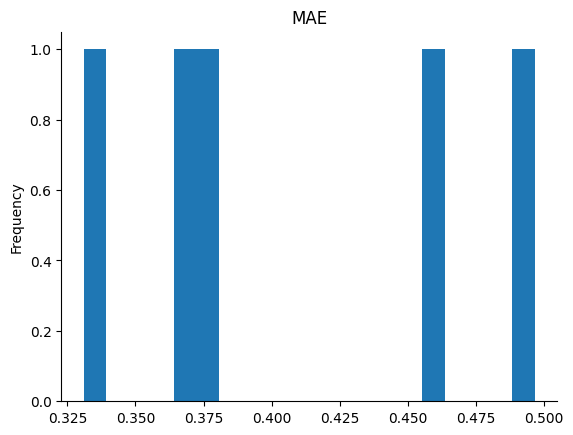

In [11]:
# @title MAE

from matplotlib import pyplot as plt
results_df['MAE'].plot(kind='hist', bins=20, title='MAE')
plt.gca().spines[['top', 'right',]].set_visible(False)